# YW

In [8]:
# python을 이용한 데이터 정제 엽습 
 
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, minmax_scale, robust_scale

%matplotlib inline

matplotlib.rc('font', family='malgun gothic')
plt.rc('font', family='malgun gothic')

plt.rcParams['axes.unicode_minus']= False

In [10]:
# 데이터 불러오기 

df_raw = pd.read_csv('./FITNESS_결측.csv',engine='python', encoding="cp949")
df_raw.head()


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [15]:
# 결측치 확인
df_raw.isnull().head()


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [16]:
df_raw.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [17]:
#결측치 true  현황요약

df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [18]:
# 범주형 변수 결측치 처리 

df_raw['GENDER'].fillna("여성", inplace= True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [19]:
# 숫자형 결측치 처리 , agg 집계함수

df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [20]:
#숫자형 결측치 처리,transform ,코드가 길거 행 바꿈필요시 \

df_raw["WEIGHT"]=\
df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.


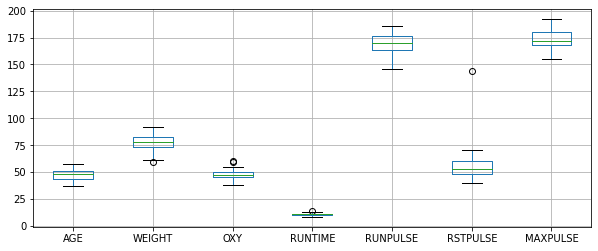

In [21]:
#boxplot  상자 수염도 figsize 그래프 크기

df_raw.boxplot(figsize=(10,4))

In [23]:
#RSTPULSE 변수에서 이상치 (100보다 큰값) 혹인: TRUE/FALSE 표시

df_raw["RSTPULSE"]>=100
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176


In [27]:
#조건 해당 자료 직접 확인

df_raw[(df_raw['RSTPULSE']>=100)]


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [28]:
#복수 조건: &(and), |(or)
df_raw[(df_raw['RSTPULSE']>=100) & (df_raw['GENDER']=="남성")]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [30]:
#RSTPULSE 변수에서 이상치 제외
df_fitness=df_raw[df_raw["RSTPULSE"]<100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [31]:
#자료 index reser: dataframe.reset_index

df_fitness.reset_index(drop=True, inplace=True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [32]:
# scale 변환
df_fitness_num=df_fitness.select_dtypes(exclude="object")
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [34]:
#문자형 변수 선택 
df_fitness_char=df_fitness.select_dtypes(include="object")
df_fitness_char.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


In [35]:
# scale 변환 (평균, 표준편차)
# scale 적용/변환 하면 numpy 의 ndarray 형태로 저장>dataframe으로 변환
df_scale_std=(df_fitness_num)
df_scale_std= pd.DataFrame(df_scale_std,columns=df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [37]:
#scale 변환 확인 결과
 
df_scale_desc=df_scale_std.describe
df_scale_std.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185
5,38,89.020,49.874,9.22,178,55,180
6,49,76.320,48.673,9.40,186,56,188
7,52,76.320,45.441,9.63,164,48,166
8,57,59.080,50.545,9.93,148,49,155
9,51,77.910,46.672,10.00,162,48,168


In [40]:
#scale 변환 (최소- 최대)

df_scale_minmax=minmax_scale(df_fitness_num)
df_scale_minmax=pd.DataFrame(df_scale_minmax,columns=df_fitness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [41]:
#scale 변환 결과 확인:요약통계량 
df_scale_desc=df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [42]:
# scale 변환(로버스트)

df_scale_robust=robust_scale(df_fitness_num)
df_scale_robust=pd.DataFrame(df_scale_robust, columns=df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [43]:
#요약 통계량 

df_scale_desc=df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [48]:
#scale 변환 결과 비교 

df_rfpulse=pd.DataFrame()
df_rfpulse["Raw"]=df_fitness_num['RSTPULSE']
df_rfpulse['Standard']=df_scale_std['RSTPULSE']
df_rfpulse['MinMax']=df_scale_minmax['RSTPULSE']
df_rfpulse['Robust']=df_scale_robust['RSTPULSE']
df_rfpulse.head().round(3)


,Raw,Standard,MinMax,Robust
0,40,40,0.000,-1.163
1,48,48,0.267,-0.419
2,45,45,0.167,-0.698
3,48,48,0.267,-0.419
4,44,44,0.133,-0.791


In [47]:
df_rfpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,53.767,0.459,0.118
std,7.542,7.542,0.251,0.702
min,40.000,40.000,0.000,-1.163
25%,48.000,48.000,0.267,-0.419
50%,52.500,52.500,0.417,0.000
75%,58.750,58.750,0.625,0.581
max,70.000,70.000,1.000,1.628


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90dd0fb310>,
      dtype=object)

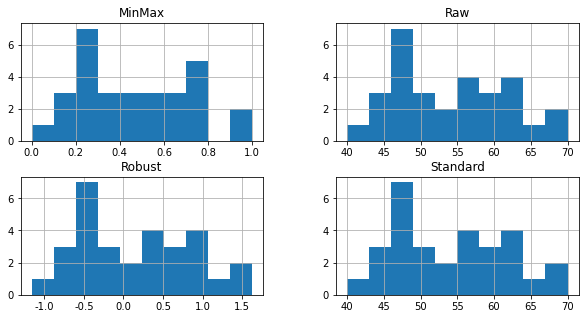

In [50]:
df_rfpulse[["Raw",'Standard','MinMax','Robust']].hist(figsize=(10,5))

# 탐색적 분석 


In [51]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale, minmax_scale, robust_scale

%matplotlib inline

matplotlib.rc('font', family='malgun gothic')
plt.rc('font', family='malgun gothic')

plt.rcParams['axes.unicode_minus']= False

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [57]:
#파이썬 데이터 가져오기
df_fitness=pd.read_csv("./통계 시험/FITNESS.csv", engine='python',encoding="cp949")
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [58]:
#환율 데이터 가져오기


df_currency=pd.read_csv("./통계 시험/환율.csv", engine='python',encoding="cp949",parse_dates=['APPL_DATE'])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWar

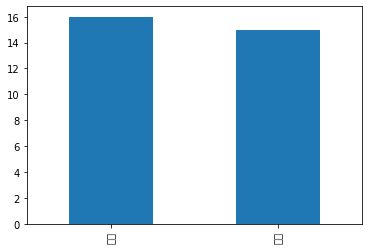

In [59]:
# bar chart 생성 
# 성별 바차트 생성
df_count=df_fitness["GENDER"].value_counts()
df_count.plot.bar()

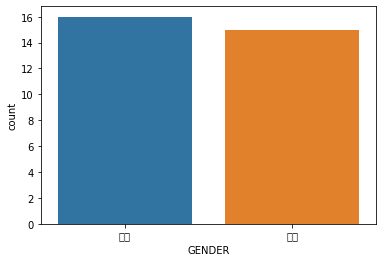

In [67]:
sns.countplot(x="GENDER",data=df_fitness)

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


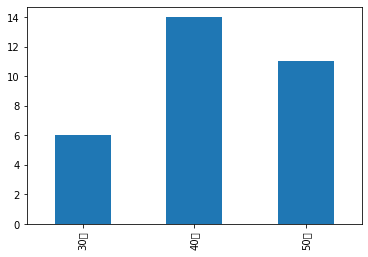

In [61]:
#연령대 바 차트 

df_count= df_fitness["AGEGROUP"].value_counts()

df_count.sort_index(inplace=True);
df_count.plot.bar()

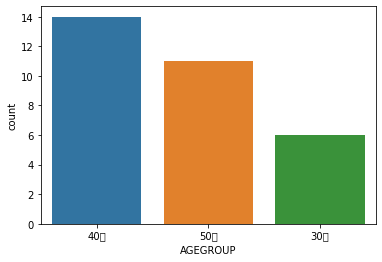

In [70]:
sns.countplot(x="AGEGROUP",data=df_fitness, order=df_fitness["AGEGROUP"].value_counts().index)

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeW

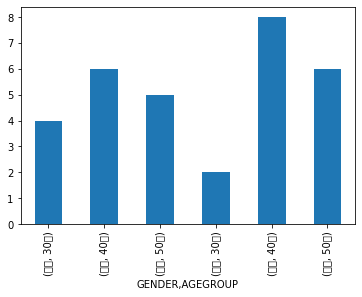

In [63]:
#dataframe.groupby['변수1',...].size():복수(1개 이상) 의범주형 변수의 자료수 통합계산
#성별+연령대 바 차트
#groupby(column):column기준 자료 요약 ,as_index:groupby변수의 index로 사용여부 
df_groupby_total=df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).size()
#df_groupby_total=df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).agg("count")위와 동일 
df_groupby_total.plot.bar()

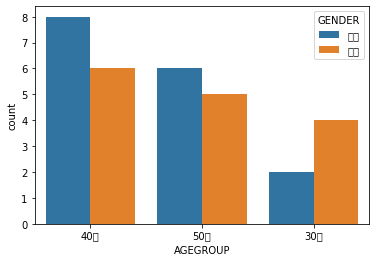

In [69]:
sns.countplot(x="AGEGROUP",hue="GENDER",data=df_fitness, order=df_fitness["AGEGROUP"].value_counts().index)

결론: 남성과 여성은 같다. 30대 40대 50대 순으로 많다. 여성들로만 봐도 40대 50대가 많다. 남녀가 포함해서 30대가 가장적다. 40대가 가장많다

# histogram

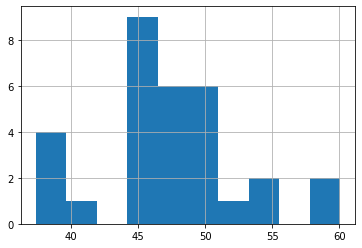

In [71]:
#히스토그램 생성: 혈당 산소 요구량 (OXY)

df_fitness["OXY"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90db42c8b0>,
      dtype=object)

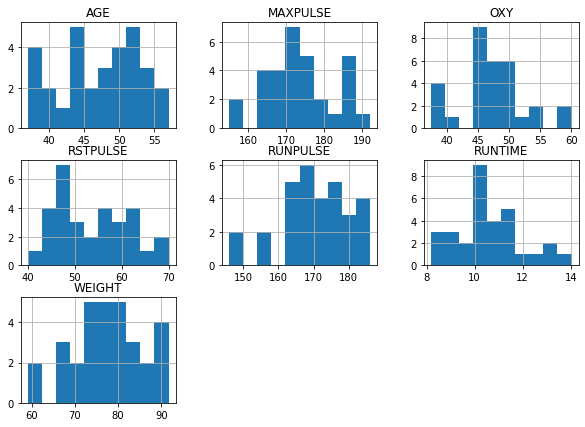

In [72]:
#히스토그램 생성: 숫자형 변수 

#hist(figsiz):figsiz=(x축크기, y축크기 )그래프 영역별 중첩처리
df_fitness.hist(figsize=(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f90db646ac0>,
      dtype=object)

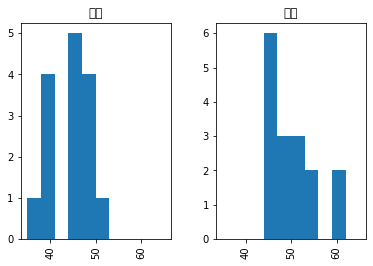

In [76]:
#히스토그램 생성: 성별 혈당산소량
#hist(column="변수",by="그룹변수",range=(최소값,최대값)) x축 범위 통일
df_fitness.hist(column="OXY",by="GENDER",range=(35,65))

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)


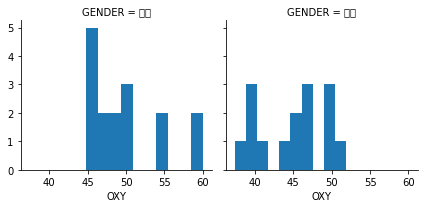

In [80]:
#seaborn 사용,FacetGrid(데이터 지정,col="컬럼지정"):지정된 컬럼의 범주별 그리드 영역 생성 , y축 범위 동일 

grid=sns.FacetGrid(df_fitness,col="GENDER")

#  map(함수, 문자형 컬럼형):범주별 히스토그램 생성 

grid.map(plt.hist,"OXY")

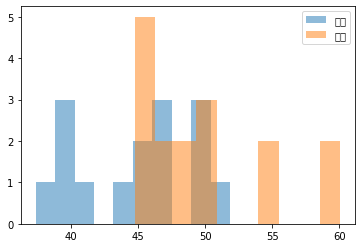

In [83]:
#히스토그램 생성: 성병 혈당 산소 요구량 중첩
#matplotlib.pyplot.hist method 이용하여 중첩 히스토그램 생성
#hist(변수 ,label="표시값",alpha=투명도 지정 (0-1))


plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]['OXY'],label="남성",alpha=0.5)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]['OXY'],label="여성",alpha=0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

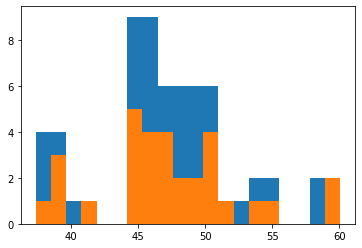

In [84]:
#히스토그램 생성:x축의 구간 수를 변경 
#hist(변수, data)
plt.hist(x="OXY",data=df_fitness)

#x축 구간(bin) 조정 (상세분포확인)
plt.hist(x="OXY",data=df_fitness, bins=20)

# BOX PLOT

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWar

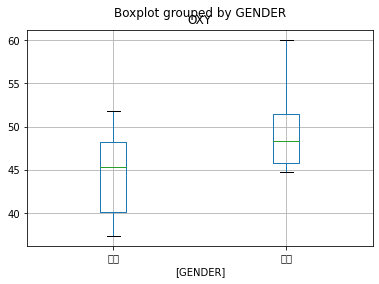

In [93]:
df_fitness.boxplot(column="OXY",by=["GENDER"])

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeW

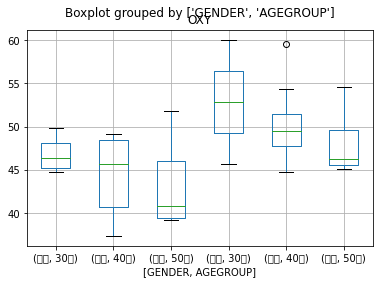

In [85]:
#박스 플랏 생성: 성별+ 연령대 혈당 산소 요구량 분포
df_fitness.boxplot(column="OXY",by=["GENDER","AGEGROUP"])

# PIE CHART

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWar

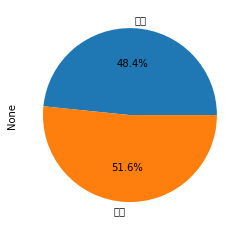

In [87]:
#성별 pie chart 
#groupby(column):column 기준  자료 요약 (size: group별 자료수 )
df_count=df_fitness.groupby(["GENDER"]).size()

#pie(데이터,labels =레이블 변수 지정, autopct=비율%표시 (%.f%%:소수점 1자리 적용)
df_count.plot.pie(y="OXY",autopct="%.1f%%")

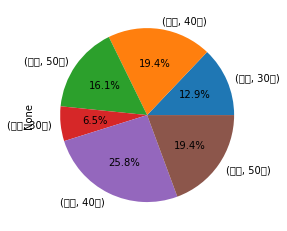

In [89]:
#groupby(column):column 기준  자료 요약 (size: group별 자료수 )
df_count=df_fitness.groupby(["GENDER","AGEGROUP"]).size()

#pie(데이터,labels =레이블 변수 지정, autopct=비율%표시 (%.f%%:소수점 1자리 적용)
df_count.plot.pie(y="OXY",autopct="%.1f%%")

# scatter plot

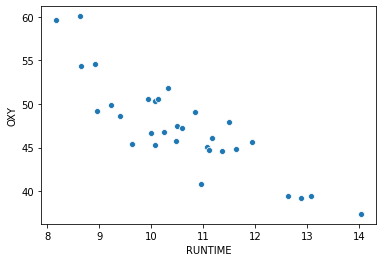

In [105]:
sns.scatterplot(x="RUNTIME",y="OXY",data=df_fitness)

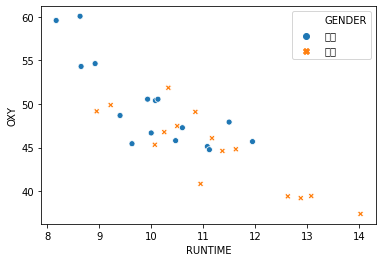

In [90]:
#scatter plot 생성: 성별로 운동시간과 혈당산소 요구량 
#seaborn.scatterplot method이용
#scatterplot(x,y,hue:그룹변수,style: 그룹별 marker구분, data)
sns.scatterplot(x="RUNTIME",y="OXY",hue="GENDER",style="GENDER",data=df_fitness)


결과 : 남여 공히, 운동시간이 증가하면서 혈당 산소요구량은 감소하고 있는 패턴을 확인할 수 있음

# scatter matrix 

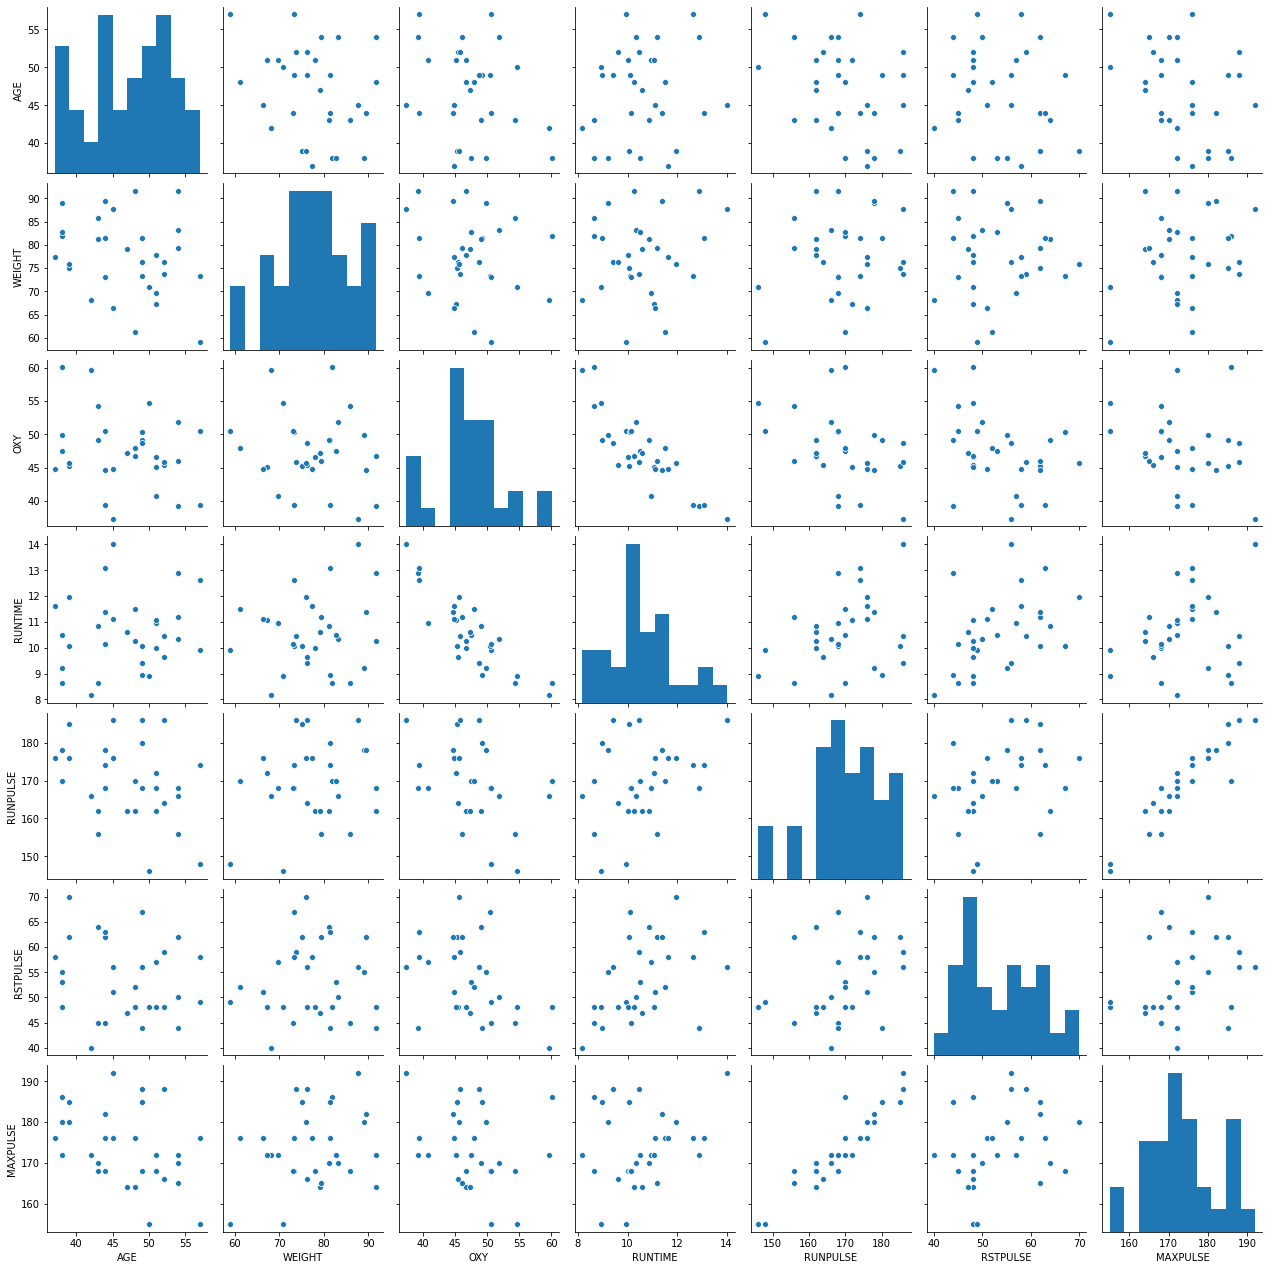

In [91]:
#scatter matrix 생성
#전체 변수간의 관계 scatter matrix 생성
#pairplot(데이터):scatter plot 그래프 생성 

sns.pairplot(df_fitness)

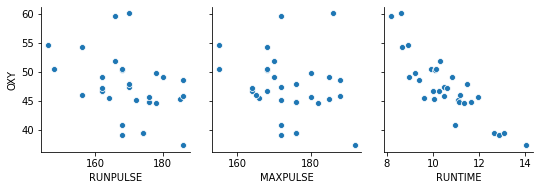

In [110]:
#y변수:혈당산소 요구량, x변수: 맥박(운동), 맥박(최대), 운동시간 scatter matrix생성
#pairplot(데이터,y_vars=y축 변수,x_vars=x축 변수): scatter plot 생성 

sns.pairplot(data=df_fitness,y_vars=["OXY"],x_vars=["RUNPULSE","MAXPULSE","RUNTIME"])

# TREND chart 

In [95]:
#트렌드 차트생성: 통화별로 매매 기준율 
#pivot 활용하여 각국 통화별 데이터 생성 

df_currency_pivot=df_currency.pivot(index="APPL_DATE",columns="CURRENCY",values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


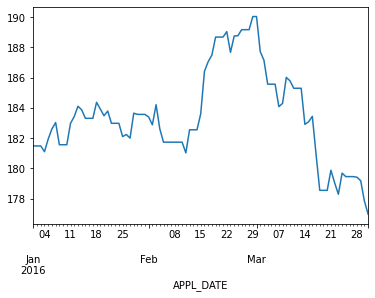

In [96]:
# 중국 위안화 별도 그림(엔화, 달러와 단위차이)

df_currency_pivot["CNY"].plot()

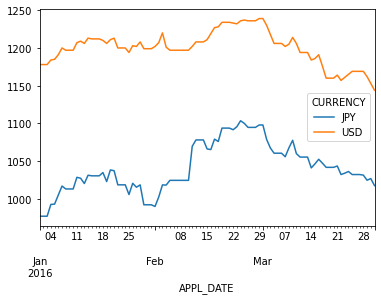

In [97]:
# 일본 엔화, 미국달러 

df_currency_pivot[["JPY","USD"]].plot()

# HEATMAP

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeW

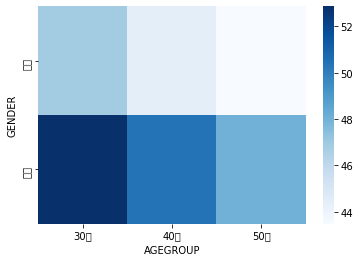

In [100]:
#HEATMAP 생성: 성별 연령대별 혈당 산소요구량 
df_agg=df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).agg("mean")

#pivot(성별, 연령대, 혈당 산소 요구량): X축(연령대), y축(성별), 값(혈당산소요구량의 평균)으로 pivot 
,data=df_fitness)

#heatmap(데이터 , cmap 생성 )
sns.heatmap(df_pivot,cmap="Blues")

# CONTOUR PLOT

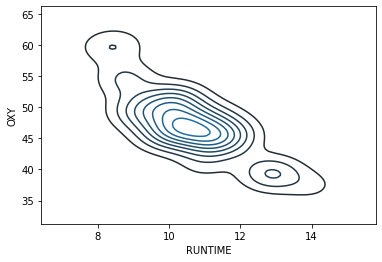

In [107]:
#CONTOUR PLOT 생성: 운동시간과 혈당 산소 요구량 
#Kdeplot(x축,y축,shade:음영 선택 여부 )
sns.kdeplot(df_fitness["RUNTIME"],df_fitness["OXY"],shade=False)
#파이썬에서는 X,Y축 값에 따른 밀도 수준을 표현

# Parallel plot

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWar

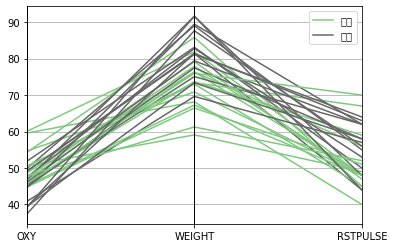

In [108]:
#parallel plot 생성: 성별에 따른 혈당 산소 요구량, 몸무게, 휴식시 맥박수
#parallel_coordinates(데이터, 그룹 변수 , cols=변수, colormap=다양한 colormap 지정)

pd.plotting.parallel_coordinates(df_fitness,"GENDER",cols=["OXY","WEIGHT","RSTPULSE"],colormap="Accent")

# Customizing

Text(485.6727272727271, 0.5, '혈당 산소 요구량')

findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anac

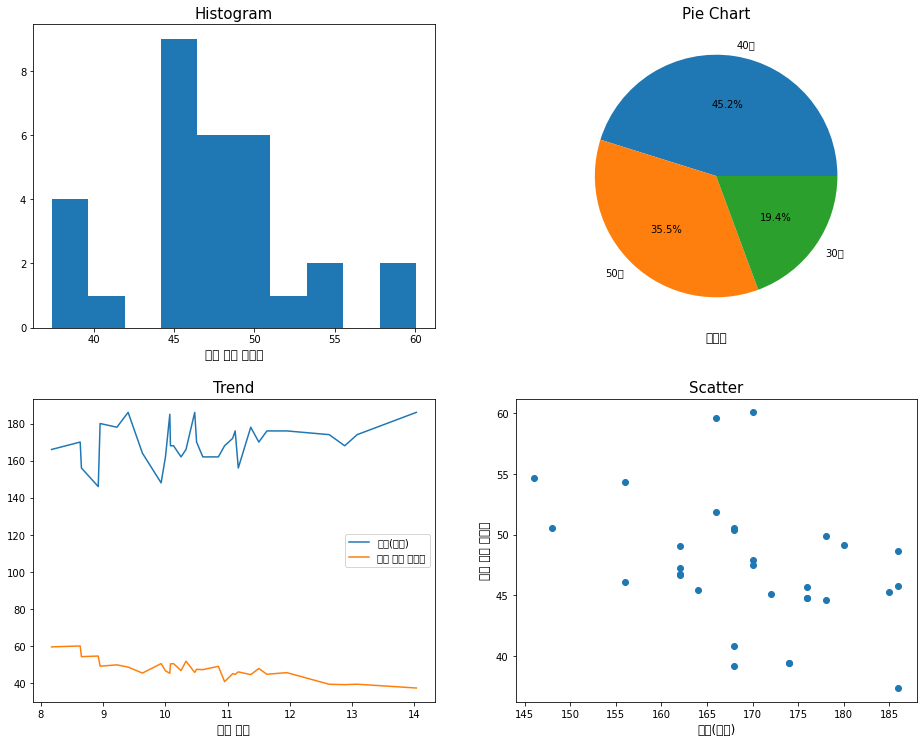

In [111]:
#대시보드 생성 

df_count = df_fitness["AGEGROUP"].value_counts()                 #pie chart를 위한 집계데이터 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))    #(2,2) 4분할 , 4개의 그래프 생성 
plt.tight_layout(w_pad=5, h_pad=5)                              # W-pad:열 사이 간격, h_pad: 행 사이의 간격  
# Histogram
axes[0, 0].hist(df_fitness["OXY"])                              #[0,0]위치에서 히스토그램 생성 
axes[0, 0].set_title("Histogram", fontsize=15)                  #제목설정, 글자크기 15
axes[0, 0].set_xlabel("혈당 산소 요구량", fontsize=12)             #x축 label 지정 
# Pie Chart
axes[0, 1].pie(df_count, labels=df_count.index.tolist(), autopct="%.1f%%")#[0,1]위치에 pie chart 생성 
axes[0, 1].set_title("Pie Chart", fontsize=15)
axes[0, 1].set_xlabel("연령대", fontsize=12)
# Trend
axes[1, 0].plot("RUNTIME", "RUNPULSE", data=df_fitness, label="맥박(운동)")#[1,0] x축 :운동시간,y축 :맥박(운동)
axes[1, 0].plot("RUNTIME", "OXY", data=df_fitness, label="혈당 산소 요구량")#X축:운동시간, Y축:산소요구량 
axes[1, 0].set_title("Trend", fontsize=15)
axes[1, 0].set_xlabel("운동 시간", fontsize=12)
axes[1, 0].legend()
# Scatter
axes[1, 1].scatter("RUNPULSE", "OXY", data=df_fitness)#[1,1]위치에 산점도 표시,X축: 맥박(운동), y축 :산소요구량 
axes[1, 1].set_title("Scatter", fontsize=15)
axes[1, 1].set_xlabel("맥박(운동)", fontsize=12)
axes[1, 1].set_ylabel("혈당 산소 요구량", fontsize=12)